#### IMPORTING NECASSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font color=red> Review the Source Documentation
</font>
1. cab data : describing attributes of Transactions like Companies, Km travelled, price charged etc.
2. Customer ID data : consists of uniques customer ids with their ages and income.
3. Transaction ID data : Consists of unique Transaction Ids with the payment mode.
4. City Data : Consists of various cities, their populations and number of users.

<font color=blue>cab_data DataFrame
</font>

In [2]:
cab_data = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w2\\DataSets-main\\Cab_Data.csv")
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


<font color=red>Understand the field names and data types of cab_data DataFrame
</font> <br>
To understand the field names, I imported CSV file. <br>
**Transaction ID** observation represents the unique transaction id for each trip. <br>
**Date of Travel** observation represents the customer's travel date in the MS Excel format. We'll change it to the regular datetime format with read_date() function later. <br>
**Company** observation includes the potential cab industries that XYZ planns to invest in, Pink Cab and Yellow Cab. <br>
**City** observation contains the list of US cities relevant to our case. <br>
**KM Travelled** observation represents the travelled KM for each customer. <br>
**Price Charged** observation represents the revenue for each travel.<br>
**Cost of Trip** observation represents the expense for each travel.

In [4]:
cab_data.shape

(359392, 7)

cab_data contains of 359392 rows and 7 columns.

In [4]:
cab_data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

To understand data types of cab_data, I used Pandas' `.dtypes` function. <br>
* Dtypes of Transaction ID and Date of Travel observations' are int64, <br>
* Dtypes of Company and City observations' are object, <br>
* KM Travelled, Prica Charged and Cost of Trip observations' are float64. 

Summary statistics of cab_data

In [8]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


<font color=blue>city DataFrame
</font>

In [3]:
city = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w2\\DataSets-main\\City.csv")
city.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


<font color=red>Understand the field names and data types of city DataFrame
</font> <br>
To understand the field names, I imported CSV file. <br>
**City** observation contains the list of US cities relevant to our case. cab_data df also has the city observation. This means that we are going to merge cab_data and city on City observation. <br>
**Population** observation represents the population of each city. <br>
**Users** observation represents the cab users' population from each city.

In [11]:
city.shape

(20, 3)

city df has 20 rows & 3 columns.

In [12]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

To understand data types of city, I used Pandas' `.dtypes` function. <br>
* Dtypes of all observations in the city dataframe are object. <br>

Summary Statistics of city df

In [6]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,PITTSBURGH PA,"959,307","302,149"
freq,1,1,1


<font color=blue>customer_id DataFrame
</font>

In [4]:
customer_id = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w2\\DataSets-main\\Customer_ID.csv")
customer_id.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


<font color=red>Understand the field names and data types of customer_id DataFrame
</font> <br>
To understand the field names, I imported CSV file. <br>
**Customer ID** observation represents the unique customer ID for each customer.<br>
**Gender** observation represents the gender of each customer. <br>
**Age** observation represents the age of each customer.

In [15]:
customer_id.shape

(49171, 4)

customer_id DataFrame has 49171 rows and 4 columns.

In [16]:
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

To understand data types of customer_id, I used Pandas' `.dtypes` function. <br>
* Dtypes of Customer ID, Age, and Income observations' are int64, <br>
* Dtype of Gender observation is object. <br> 

<font color=blue>transaction_id DataFrame
</font>

In [5]:
transaction_id = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w2\\DataSets-main\\Transaction_ID.csv")
transaction_id.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


<font color=red>Understand the field names and data types of transaction_id DataFrame
</font> <br>
To understand the field names, I imported CSV file. <br>
**Transaction ID** observation represents the unique transaction id for each trip. cab_data also has Transaction ID, thus transaction_id and cab_data DataFrames can be merged on Transaction ID column <br>
**Customer ID** observation represents the unique customer ID for each customer. customer_id also has Customer_ID observation hence we are going to merge these two DataFrames on Customer ID column.<br>
**Payment_Mode** observation represents the payment mode for each transaction. It can either be Cash or Card.

In [18]:
transaction_id.shape

(440098, 3)

transaction_id DataFrame has 440098 rows and 3 columns.

In [21]:
transaction_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

To understand data types of transaction_id, I used Pandas' `.dtypes` function. <br>
* Dtypes of Customer ID, and Transaction ID observations' are int64, <br>
* Dtype of Payment_Mode observaiton is object. <br> 

<font color=red>Identify relationships across the files
</font> <br>
* **customer_id** DataFrame includes the customer related knowledge such as `Customer_ID`, `Age`, `Income` and `Gender`. Moreover, **transaction_id** DataFrame contains of transaction related knowledge such as `Customer_ID`, `Payment_Mode` and `Transaction_ID`. These two DataFrames are related with `Customer ID` observation.
* **cab_data** DataFrame includes the trip related knowledge such as `Transaction ID` of the trip, `Date of Travel`, `KM Travelled` during the trip, `Price Charged`for each trip, `Cost of Trip`, `Company` that each cab belongs to, and `City` that trip was made. In the meantime, **city** DataFrame is all about city related knowledge like `City` of the trip,	`Population`of that city,	Pink and Yellow Cab Company `Users` within the city. In this case, **cab_data** and **city** DataFrames are related with `City`observation.
	

<font color=red>Determine which files should be joined versus which ones should be appended
</font> <br>
* Instead of `pd.join`, I am going to use `pd.merge` to merge DataFrames because every DataFrame has one common column. In join, I need to state the same column with lsuffix and rsuffix.(https://stackoverflow.com/a/54955652/13852388) This will create extra burden so I am not going to do it.
* Instead of `pd.append`, I am going to use `pd.merge` because there is no `on` option of `pd.append`(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) . This will cause double print of same columns. Revealing same data is just a burden for our merged DataFrames. 
* **customer_id** DataFrame and **transaction_id** DataFrames both have `Customer_ID` observation. Thus, we are going to merge these two DataFrames on `Customer_ID` observation and name this merge as `merge_1`
* **cab_data** and **city** DataFrames both have`City` observation. Hence, we are going to merge these two DataFrames on `City`observation and name it as `merge_2`

**MERGE 1**

In [6]:
merge_1 = customer_id.merge(transaction_id, on="Customer ID", how = "outer")
merge_1

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


#### MERGE 2

In [7]:
merge_2 = cab_data.merge(city, on = "City", how = "outer")
merge_2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015.0,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
359388,10440104.0,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105.0,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106.0,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"
359391,10440107.0,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,"418,859","127,001"


<font color=red>Create master data and explain the relationship
</font> <br>
To create master data, I am going to merge `merge_1` and `merge_2` DataFrames and create `merge_3` : the master data. <br>
`merge_3` will include 
* `Customer_ID`, `Age`, `Income` and `Gender`observations from `customer_id` DataFrame,
* `Customer_ID`, `Payment_Mode` and `Transaction_ID` observations from `transaction_id` DataFrame,
* `Transaction ID` , `Date of Travel`, `KM Travelled` , `Price Charged`, `Cost of Trip`, `Company`  and `City` observations from `cab_data` DataFrame, 
* and `City`,`Population`,	 `Users` observations from `city` DataFrame.
* As I merged these DataFrames on the same observation, there will be no duplicated values. Thus, there will be no need for <font color=red>Identify and remove duplicates
</font>  step.

#### MERGE 3

In [8]:
merge_3 = merge_2.merge(merge_1,on= "Transaction ID",how = "outer")
merge_3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290.0,Male,28.0,10813.0,Card
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703.0,Male,27.0,9237.0,Card
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash
3,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020.0,Male,23.0,23327.0,Cash
4,10000015.0,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182.0,Male,33.0,8536.0,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440094,10439406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23382.0,Female,51.0,18919.0,Card
440095,10439409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21420.0,Female,18.0,4531.0,Card
440096,10439413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49888.0,Male,23.0,3226.0,Card
440097,10439418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46456.0,Male,20.0,30662.0,Cash


In [73]:
merge_3["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

<font color=red>Feature transformation
</font> <br>
I am going to make feature transformation in 5 steps. In the feature transformation, I referanced this article(https://towardsdatascience.com/feature-transformation-for-data-scientists-3a9eed562752) from the towardsdatascience 
1. **Data Imputation**
In this step, I'll detect and replace the NA values. In other words, I'll make <font color=red>NA Value Analyse
</font> To analyse NA Values, `pd.fillna()` could be used. However, `pd.fillna()`only replace NA values with one data type, and this is not useful our case because our master data(merge_3) includes more than one data type. `pd.fillna()` can also cause errors for some ML Algorithms. Thus, my choice will be Sklearns `SimpleImputer`. <br>
SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder. In this case, we'll replace our NaN values with using the mean along each column. <br>

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imr = imr.fit(merge_3)

In [11]:
imputed_data = imr.transform(merge_3)

In [12]:
merge_3 = pd.DataFrame(imputed_data)

In [13]:
merge_3.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290.0,Male,28.0,10813.0,Card
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703.0,Male,27.0,9237.0,Card
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.2,97.632,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash


In [13]:
merge_3 = merge_3.rename(columns={0:"Transaction-ID",	1:"Date-of-Travel",	2:"Company", 3:"City",	4:"KM-Travelled",	5:"Price-Charged",	6:"Cost-of-Trip",	7:"Population",	8:"Users",	9:"Customer-ID"	, 10:"Gender",	11:"Age",	12:"Income(USD/Month)",	13:"Payment_Mode"})

In [16]:
merge_3.head(3)

,Transaction-ID,Date-of-Travel,Company,City,KM-Travelled,Price-Charged,Cost-of-Trip,Population,Users,Customer-ID,Gender,Age,Income(USD/Month),Payment_Mode
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290.0,Male,28.0,10813.0,Card
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703.0,Male,27.0,9237.0,Card
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.2,97.632,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash


In [14]:
merge_3.isnull().values.any()

False

Seems that we have no NaN values, all the NaN values are replaced with the most frequent value of each column.

**2. Data Encoding** <br>
The computer reads numbers, even the most complex ones. It is much easier to understand numerical data rather than categorical, which is why I'll encode data.


#### Automatic Encoding

In [17]:
df = merge_3.drop(columns = "Company")
y = merge_3[["Company"]]
from sklearn.feature_extraction import DictVectorizer
# df'mizi dict'e dönüştürelim
df_dict = df.to_dict("Records")
# Dict Vectorizer'ı oluşturalım. sparse=False set ettkik çünkü çıktıyı scipy.sparse metriği olarak almak istemiyorum.
dv = DictVectorizer(sparse=False)
# dv'yi object_degerler e uygulayalım
df_encoded = dv.fit_transform(df_dict)
# encoded edilmiş df'mizin satır ve sütun sayılarını döndürelim
df_encoded = pd.DataFrame(df_encoded)

In [18]:
print("Shape before the encoding: ", df.shape)
print("Shape after the encoding: ", df_encoded.shape)

Shape before the encoding:  (440099, 13)
Shape after the encoding:  (440099, 72)


* 60 new columns were added, now let's apply Feature Extraction to our data and see which one performs better.

**Feature Selection** <br>
Let's select our features for accuracy score

In [19]:
# Preprocessing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a = scaler.fit_transform(df_encoded)
df_prep = pd.DataFrame(a)
print(df_prep.shape)
df_prep.head()

(440099, 72)


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-0.584946,7.565531,-0.106066,-0.268975,-0.38427,-0.127289,-0.093635,-0.350018,-0.121996,-0.082985,...,-0.136041,-0.140496,-0.054702,-0.834205,-0.066385,-0.068644,-0.220966,-0.073535,-0.268975,-0.082985
1,-0.664420,7.565531,-0.106066,-0.268975,-0.38427,-0.127289,-0.093635,-0.350018,-0.121996,-0.082985,...,-0.136041,-0.140496,-0.054702,-0.834205,-0.066385,-0.068644,-0.220966,-0.073535,-0.268975,-0.082985
2,1.401917,7.565531,-0.106066,-0.268975,-0.38427,-0.127289,-0.093635,-0.350018,-0.121996,-0.082985,...,-0.136041,-0.140496,-0.054702,-0.834205,-0.066385,-0.068644,-0.220966,-0.073535,-0.268975,-0.082985
3,-0.982318,7.565531,-0.106066,-0.268975,-0.38427,-0.127289,-0.093635,-0.350018,-0.121996,-0.082985,...,-0.136041,-0.140496,-0.054702,-0.834205,-0.066385,-0.068644,-0.220966,-0.073535,-0.268975,-0.082985
4,-0.187573,7.565531,-0.106066,-0.268975,-0.38427,-0.127289,-0.093635,-0.350018,-0.121996,-0.082985,...,-0.136041,-0.140496,-0.054702,-0.834205,-0.066385,-0.068644,-0.220966,-0.073535,-0.268975,-0.082985


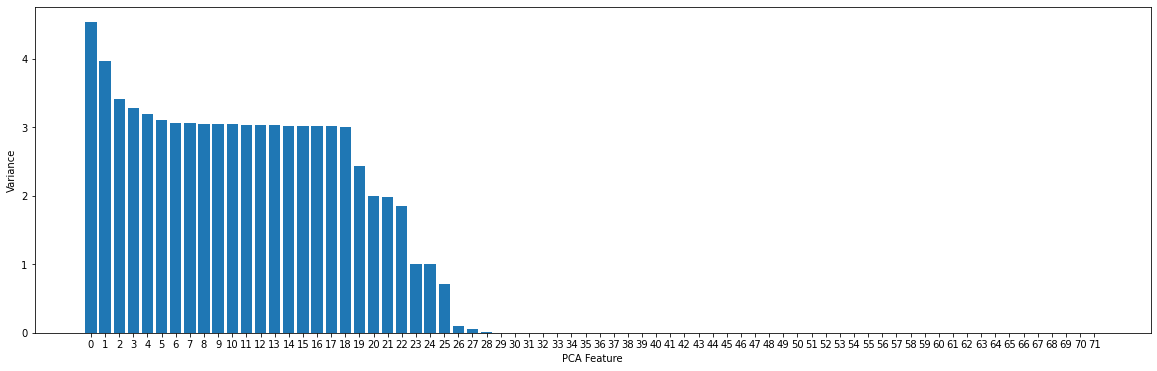

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_prep)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.gcf().set_size_inches(20, 6)
plt.xticks(features)
plt.ylabel("Variance")
plt.xlabel("PCA Feature")
plt.show()

In [21]:
pca = PCA(n_components = 25)
df = pca.fit_transform(df_prep)
df.shape

(440099, 25)

* or we can just go with vairance focused, but this time we may still have lots of features

In [22]:
pca = PCA(n_components = 0.9)
df1 = pca.fit_transform(df_prep)
df1.shape

(440099, 21)

* Let's see which one'll perform better.

**df**

In [41]:
# Manuel Encoding the y
y = y.replace({"Company":{"Pink Cab":0,"Yellow Cab":1}})
# Splitting Data into Training & Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(
    df,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=8, min_samples_leaf=17, min_samples_split=7,
                       random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy score for df is: ",dtc.score(X_test,y_test))

Accuracy score for df is:  0.8230038627584639


In [23]:
dfdeneme = pd.DataFrame(df)
print(dfdeneme.shape)
dfdeneme.head(3)

(440099, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.518745,0.233597,0.181123,0.542275,1.552114,4.072574,2.378517,7.664319,-7.906868,-3.210723,...,-0.374875,-0.142402,-0.211267,0.015519,0.846933,-0.806388,-2.465982,2.028116,-0.243603,-0.706771
1,-1.523333,0.203240,0.180922,0.539197,1.554375,4.071742,2.378419,7.664798,-7.907199,-3.209366,...,-0.374084,-0.142514,-0.211144,0.015402,0.823238,-0.806054,-2.467845,2.036804,-0.213961,-0.918683
2,-2.111680,0.070929,0.226468,0.647169,1.664369,3.995560,2.488559,7.663586,-7.941887,-3.170713,...,-0.361626,-0.131697,-0.190770,-0.000074,-1.520119,2.046975,-2.091489,2.259719,1.451379,0.326841


**1. Condensed Nearest Neighbor**

In [28]:
from imblearn.under_sampling import CondensedNearestNeighbour
# before data imbalancing
oneb = dfdeneme[[1]]
print("Before imbalancing: ",oneb.shape)
X = dfdeneme.drop(columns = 1)
undersample = CondensedNearestNeighbour(n_neighbors = 1)
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (440099,)


ValueError: Unknown label type: 'continuous'

**Result** <br>
* During the CNN procedure,because the KNN algorithm is used to **classify** points to determine if they are to be added to the store or [not](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/?unapproved=608714&moderation-hash=b4584d50d33cda4761eefa4d36d2aebb#comment-608714), I receive `ValueError: Unknown label type: 'continuous'`
* To overcome this error, KNN Regressor needed to be used instead of KNN Classifier.The way I understood, CondensedNearestNeighbour uses the KNN Classifier by default. Thus, this method can not be applied to my case.
* Maybe, the problem is in the encoding and PCA steps. Let's try manuel encoding. 

In [16]:
mergeb = merge_3
print(mergeb.isnull().values.any())
print(mergeb.dtypes)
mergeb.head(3)

False
Transaction-ID       object
Date-of-Travel       object
Company              object
City                 object
KM-Travelled         object
Price-Charged        object
Cost-of-Trip         object
Population           object
Users                object
Customer-ID          object
Gender               object
Age                  object
Income(USD/Month)    object
Payment_Mode         object
dtype: object


,Transaction-ID,Date-of-Travel,Company,City,KM-Travelled,Price-Charged,Cost-of-Trip,Population,Users,Customer-ID,Gender,Age,Income(USD/Month),Payment_Mode
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290.0,Male,28.0,10813.0,Card
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703.0,Male,27.0,9237.0,Card
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.2,97.632,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash


In [17]:
mergeb = mergeb.replace({"City":{"NEW YORK NY":0,"CHICAGO IL":1, "LOS ANGELES CA":2, "WASHINGTON DC":3, "BOSTON MA":4, "SAN DIEGO CA":5, "SILICON VALLEY":6, "SEATTLE WA":7, "ATLANTA GA":8, "DALLAS TX":9, "MIAMI FL":10, "AUSTIN TX":11, "ORANGE COUNTY":12, "DENVER CO":13, "NASHVILLE TN":14, "SACRAMENTO CA":15, "PHOENIX AZ":16, "TUCSON AZ":17, "PITTSBURGH PA":18, "SAN FRANCISCO CA":19}})
mergeb = mergeb.replace({"Gender":{"Female":0,"Male":1}})
mergeb = mergeb.replace({"Payment_Mode":{"Cash":0,"Card":1}})
mergeb = mergeb.replace({"Company":{"Pink Cab":0,"Yellow Cab":1}})

In [18]:
mergeb["Population"] = mergeb["Population"].str.replace(",","")
mergeb["Users"] = mergeb["Users"].str.replace(",","")
mergeb = mergeb.astype("float")

In [19]:
mergeb = mergeb.sample(n=10000)
mergeb.shape

(10000, 14)

In [25]:
#from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
undersample = CondensedNearestNeighbour(n_neighbors = 1)
oneb = mergeb[["Transaction-ID"]]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "Transaction-ID")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000, 1)
After imbalancing:  (10000, 1)


In [23]:
from imblearn.under_sampling import CondensedNearestNeighbour
undersample = CondensedNearestNeighbour(n_neighbors = 1)
oneb = mergeb[["City"]]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "City")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000, 1)
After imbalancing:  (91, 1)


**Result**
* Undersampling butchered 9909 rows from City column, whereas Transaction-ID column didn't loose any row. If I try to merge or join these two columns to create balanced df, it will lead massive amount of Na values -if I try to replace them, much more imbalanced dataset than before-
* Thus, CNN doesn't work for my case.

## Methods that Select Examples to Delete
**Tomek Links for Undersampling**

In [26]:
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
oneb = mergeb[["Transaction-ID"]]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "Transaction-ID")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000, 1)
After imbalancing:  (4510, 1)


In [27]:
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
oneb = mergeb[["City"]]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "City")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000, 1)
After imbalancing:  (9998, 1)


**Result**<br>
* Once again, there are huge difference between the City & Transaction ID columns after undersampling; 9998 (City) - 4510 (Transaction-ID) = 5488
* If I try to merge or join these two columns to create balanced df, it will lead massive amount of Na values -if I try to replace them, much more imbalanced dataset than before-
* Thus, Tomek Links for Undersampling doesn't work for my case.

**Edited Nearest Neighbors Rule for Undersampling**

In [28]:
from imblearn.under_sampling import EditedNearestNeighbours
undersample = EditedNearestNeighbours(n_neighbors=3)
oneb = mergeb[["Transaction-ID"]]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "Transaction-ID")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000, 1)
After imbalancing:  (1, 1)


In [29]:
from imblearn.under_sampling import EditedNearestNeighbours
undersample = EditedNearestNeighbours(n_neighbors=3)
oneb = mergeb[["City"]]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "City")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000, 1)
After imbalancing:  (9938, 1)


**Result**<br>
* Once again, there are huge difference between the City & Transaction ID columns after undersampling; 9938 (City) - 1 (Transaction-ID) = 9937
* If I try to merge or join these two columns to create balanced df, it will lead massive amount of Na values -if I try to replace them, much more imbalanced dataset than before-
* Thus, EditedNearestNeighbours for Undersampling doesn't work for my case.

## Combinations of Keep and Delete Methods
**One-Sided Selection for Undersampling**

In [31]:
from imblearn.under_sampling import OneSidedSelection
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
oneb = mergeb["City"]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "City")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000,)


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

**Result** <br>
I couldn't find anything like this error on the internet. There are some posts related with this error, but none of them face it while using One-Sided Selection for Undersampling. Thus, One-Sided Selection for Undersampling doesn't work for my case.

**Neighborhood Cleaning Rule for Undersampling**

In [33]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
oneb = mergeb["City"]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "City")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000,)
After imbalancing:  (9970, 1)


In [34]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
oneb = mergeb[["Transaction-ID"]]
print("Before imbalancing: ",oneb.shape)
X = mergeb.drop(columns = "Transaction-ID")
X, oneb = undersample.fit_resample(X, oneb)
onea = pd.DataFrame(oneb)
print("After imbalancing: ", onea.shape)

Before imbalancing:  (10000, 1)
After imbalancing:  (75, 1)


**Result**
* Once again, there are huge difference between the City & Transaction ID columns after undersampling; 9970 (City) - 75 (Transaction-ID) = 9895
* If I try to merge or join these two columns to create balanced df, it will lead massive amount of Na values -if I try to replace them, much more imbalanced dataset than before-
* Thus, NeighbourhoodCleaningRule doesn't work for my case.